In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as f
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import pandas as pd
import math

In [ ]:
import h5py
import numpy as np
filepath = 'drive/MyDrive/DeepLearning_Project/Data/Dic_ocean.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


In [ ]:
dataset = arrays['Dic_ocean']

In [ ]:
df = pd.DataFrame(data=dataset)

In [ ]:
df = df[[0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,16,18]]


In [ ]:
warm_mask = (df[[16]] == 2.0)

In [ ]:
warm_mask.value_counts()

16   
False    4890838
True      515667
dtype: int64

In [ ]:
warm_mask.keys()

Int64Index([16], dtype='int64')

In [ ]:
df = df.loc[warm_mask[16]]

In [ ]:
df.shape

(515667, 15)

In [ ]:
df.mean(axis=0)

0     242.621212
1     212.576240
2     243.812183
3     216.070979
4     244.521350
5     243.049952
6     220.828714
7     239.116355
8     224.794155
9     242.399176
10    235.646410
11    248.395952
12    250.162872
16      2.000000
18      0.070368
dtype: float64

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,16,18
count,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.000000,515667.0,205095.000000
mean,242.621212,212.576240,243.812183,216.070979,244.521350,243.049952,220.828714,239.116355,224.794155,242.399176,235.646410,248.395952,250.162872,2.0,0.070368
std,17.200391,27.984668,15.269488,25.754175,13.453230,13.157681,20.412951,13.749969,15.926546,14.502590,16.208901,4.252815,9.245554,0.0,0.221431
min,157.029999,80.660004,150.070007,93.500000,153.699997,169.169998,124.610001,168.020004,161.820007,169.490005,159.369995,212.080002,191.000000,2.0,0.000000
25%,237.149994,200.949997,237.919998,204.369995,238.619995,237.089996,210.289993,231.610001,214.600006,234.020004,225.559998,246.039993,246.320007,2.0,0.000000
50%,248.240005,221.029999,248.529999,223.679993,248.449997,246.679993,226.479996,241.490005,226.300003,245.000000,237.210007,248.110001,252.410004,2.0,0.000000
75%,253.929993,232.690002,254.100006,234.550003,253.820007,252.119995,235.720001,248.679993,236.020004,253.050003,247.520004,250.750000,256.290009,2.0,0.007078
max,268.350006,263.179993,269.869995,263.779999,269.519989,268.950012,264.350006,273.079987,270.399994,277.470001,278.640015,267.119995,272.679993,2.0,4.694516


In [ ]:
count_nan = len(df) - df.count()

In [ ]:
count_nan

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
16         0
18    310572
dtype: int64

In [ ]:
df = df[pd.notnull(df[18])]

In [ ]:
np.count_nonzero(df, axis=0)

array([205095, 205095, 205095, 205095, 205095, 205095, 205095, 205095,
       205095, 205095, 205095, 205095, 205095, 205095,  55863])

In [ ]:
test_split = .3
random_seed =1

In [ ]:
df = df.drop(16, 1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,18
1492263,216.160004,171.330002,228.279999,188.250000,242.600006,246.830002,226.570007,237.729996,228.029999,229.429993,218.250000,246.960007,246.110001,0.000000
1492264,216.160004,171.330002,228.279999,188.250000,242.600006,246.830002,226.570007,237.729996,228.029999,229.429993,218.250000,246.960007,246.110001,0.000000
1492265,216.160004,171.330002,228.279999,188.250000,242.600006,246.830002,226.570007,237.729996,228.029999,229.429993,218.250000,246.960007,246.110001,0.000000
1492266,216.160004,171.330002,228.279999,188.250000,242.600006,246.830002,226.570007,237.729996,228.029999,229.429993,218.250000,246.960007,246.110001,0.000000
1492267,216.160004,171.330002,228.279999,188.250000,242.600006,246.830002,226.570007,237.729996,228.029999,229.429993,218.250000,246.960007,246.110001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405911,182.360001,122.800003,197.460007,145.199997,211.350006,218.880005,177.789993,245.919998,225.130005,254.500000,248.979996,247.539993,254.229996,0.072376
5405912,182.360001,122.800003,197.460007,145.199997,211.350006,218.880005,177.789993,245.919998,225.130005,254.500000,248.979996,247.539993,254.229996,0.190862
5405913,184.570007,125.870003,196.429993,142.940002,209.190002,217.080002,173.929993,238.800003,213.289993,248.649994,239.649994,246.960007,253.229996,0.291011
5405914,184.570007,125.870003,196.429993,142.940002,209.190002,217.080002,173.929993,238.800003,213.289993,248.649994,239.649994,246.960007,253.229996,0.369625


In [ ]:
data1 = df.to_numpy()

In [ ]:
data1.shape

(205095, 14)

In [ ]:
Full_data = data1.astype(np.float)

In [ ]:
#non_zero_flag = (df[[18]] > 0.0)

In [ ]:
#df_nonzero = df.loc[non_zero_flag[18]]

In [ ]:
#df_nonzero

In [ ]:
from scipy import stats

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
test_split = .3
dataset_size = data1.shape[0]
indices = list(range(dataset_size))
split = int(np.floor(test_split * dataset_size))
np.random.seed(random_seed)
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]

# Creating Data Samples:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [ ]:
# from torch.utils.data.sampler import SubsetRandomSampler
# test_split = 1
# dataset_size = data1.shape[0]
# indices = list(range(dataset_size))
# np.random.seed(random_seed)
# np.random.shuffle(indices)
# test_indices = indices[:]

# # Creating Data Samples:
# test_sampler_nonzero = SubsetRandomSampler(test_indices)

In [ ]:
# setup hyperparameters
epochs = 1000
lr = 1e-4
batchsize =256 #128 #4096 #1024 #16384 #1024
test_split = 0.3

In [ ]:
train_loader = torch.utils.data.DataLoader(Full_data,sampler=train_sampler, batch_size=batchsize)
test_loader = torch.utils.data.DataLoader(Full_data,sampler=test_sampler, batch_size=batchsize)

In [ ]:
#test_loader_nonzer = torch.utils.data.DataLoader(non_zero_Full_data,sampler=test_sampler_nonzero, batch_size=batchsize)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

In [ ]:
# a)setting up neural net
class neural_net(nn.Module):
  def __init__(self):
      super(neural_net, self).__init__()
      self.fc1 = nn.Linear(13,256) # 26 feature
      self.fc2 = nn.Linear(256,128)
      self.fc3 = nn.Linear(128, 1)
      self.relu = nn.ReLU()
      self.droput = nn.Dropout(0.1)

  def forward(self, x):
      x = self.fc1(x) #
      x = self.relu(x) #25   
      x = self.droput(x)        
      x = torch.flatten(x, start_dim=1)
      x = self.relu(self.fc2(x))
      #x = self.droput(x) 
      x = self.fc3(x)

      return x

In [ ]:
neural = neural_net()
neural.to(device)

neural_net(
  (fc1): Linear(in_features=13, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (droput): Dropout(p=0.1, inplace=False)
)

In [ ]:
dataiter = iter(train_loader)
array = dataiter.next()

print(array.shape)

torch.Size([256, 14])


In [ ]:
it = iter(train_loader)
Input_batch = next(it)
#print(Input_batch[:,13])
Input_batch = Input_batch[:,0:13].float()
Input_batch = Input_batch.to(device)
print(neural.forward(Input_batch).shape)

torch.Size([256, 1])


In [ ]:
len(train_loader)

561

In [ ]:
def fit(model,trainloader):
  Loss = nn.MSELoss()
  optimizer = optim.AdamW(model.parameters(), lr)
  acc_epoch=[]
  #d-dimensional vector representing diag(Gt) to store a running total of the squares of the gradients.
  for e in range(epochs):
      running_loss = 0
      for input in trainloader:  
          input = input.to(device)    
          optimizer.zero_grad()         
          output = model(input[:,0:13].float())
          #print(output)
          #output = output.view(-1,1,1,1)
          loss = Loss(output, input[:,13].float().view(-1,1))
          #print(loss)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
      print(e,math.sqrt(running_loss/len(trainloader)))
      _,rmse,_ = evaluate_model(model, test_loader)
      #loss_epoch.append(math.sqrt(running_loss/len(trainloader)))
      if(e!=0):
        acc_epoch.append(rmse)
      if(math.sqrt(running_loss/len(trainloader))<0.12):
        break
  plt.plot(acc_epoch)
  plt.ylabel('test_rmse')
  plt.xlabel('Epochs')
  plt.grid(True)
  plt.show()   
          #print("Epoch {} - Training loss: {} -Test Accuracy:{}".format(e, running_loss))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = list(), list()
    for inputs in test_loader:
        # evaluate the model on the test set
        inputs = inputs.to(device)
        yhat = model(inputs[:,0:13].float())
        # retrieve numpy array
        yhat = yhat.cpu().detach().numpy()
        actual = inputs[:,13].cpu().float().numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    predictionarray = predictions
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    rmse = math.sqrt(mse)
    print(rmse)
    return mse,rmse,predictionarray

In [ ]:
from torchsummary import summary

In [ ]:
summary(neural,(1,13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]           3,584
              ReLU-2               [-1, 1, 256]               0
           Dropout-3               [-1, 1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
            Linear-6                    [-1, 1]             129
Total params: 36,609
Trainable params: 36,609
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.14
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


0 2.9968271248219582
0.3945317787695637
1 0.2252484725773041
0.22383832858330582
2 0.21899504011687698
0.22628751871776603
3 0.21800596875430409
0.2417098148990246
4 0.22116370449311487
0.22688164102276775
5 0.22082858133973882
0.22174986178115355
6 0.2246708261620479
0.22932871413904088
7 0.22432360519355957
0.2170021700344046
8 0.23065156821004643
0.21531060386841538
9 0.23318780457711372
0.20725387623340563
10 0.23154132337976036
0.21734369753762223
11 0.23269050213953393
0.22039861686899098
12 0.22942091516923854
0.25754631635164077
13 0.2285091820536253
0.23353870119570902
14 0.22877932043843233
0.20672241604149985
15 0.22374083233228326
0.22228760903887831
16 0.22425734646993867
0.22190391862485573
17 0.2253307809908141
0.20260805593711223
18 0.22519615550527664
0.34767349071829295
19 0.21743024046810755
0.2581888832631452
20 0.22324615463273978
0.21883604366979073
21 0.21606146223750222
0.20220685658373197
22 0.22169079908085346
0.22011355758422452
23 0.22048029376788786
0.20229

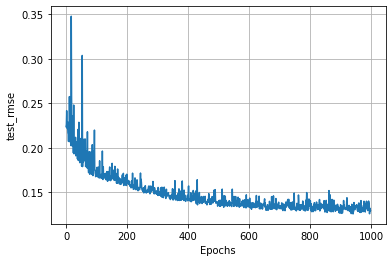

In [ ]:
fit(neural,train_loader)

In [ ]:
torch.save(neural.state_dict(), "drive/MyDrive/DeepLearning_Project/Models/Adamw1000lr1e-256batchafterfilterting16with2nodrpout")

In [ ]:
#evaluate_model(neural,test_loader)

In [ ]:
mse,rmse,prediction = evaluate_model(neural,test_loader)

0.1296833126701982


In [ ]:
predpd = pd.DataFrame(prediction)

In [ ]:
predpd.describe()

,0
count,61528.000000
mean,0.066623
std,0.170266
min,-0.323866
25%,0.004287
50%,0.027888
75%,0.072114
max,3.550463


In [ ]:
len(test_loader_nonzer)

In [ ]:
mse_nonzero,rmse_nonzero,pred_nonzer =evaluate_model(neural,test_loader_nonzer)

In [ ]:
predpd_nonzer = pd.DataFrame(pred_nonzer)

In [ ]:
predpd

,0
0,2.042631
1,1.969863
2,1.954087
3,1.876247
4,1.994550
...,...
61523,2.037039
61524,1.962241
61525,2.016478
61526,1.913239


In [ ]:
predpd_nonzer.describe()

,0
count,205095.000000
mean,1.982869
std,0.074824
min,-0.144884
25%,1.941550
50%,1.983853
75%,2.024813
max,4.360437
